## Variable aleatoria Binomial con parámetros $n$ y $p\in(0,1)$

Decimos que una v.a. $X$ tiene distribución binomial con parámetros $n$ y $p$, si su función de densidad está dada por
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} \binom{n}{x}p^x (1-p)^{n-x}, \quad \text{si } x\in \{0,1,...,n\} \\
0, \quad \text{e.o.c} \end{cases}$$
donde $n\in\mathbb{Z}_{+}$ y $0<p<1$.

**Obs:** Los ensayos deben ser independientes. 

La esperanza de $X$ es
$$\begin{align*}
\mathbb{E}[X]&= \sum_{x \mathop = 0}^n x \binom n x p^x (1-p)^{n - x}\\
&=\sum_{x \mathop = 1}^n x \binom n x p^x (1-p)^{n - x}\\
&= \sum_{x \mathop = 1}^n n \binom {n - 1} {x - 1} p^x (1-p)^{n - x}\\
&= n p \sum_{x \mathop = 1}^n \binom {n - 1} {x - 1} p^{x - 1} (1-p)^{( {n - 1}) - ( {x - 1}) }\\
&=n p \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j}\\
&=np.
\end{align*}$$
y 
$$ \begin{align*}
\mathbb{E}[X^2]&= \sum_{x \mathop = 0}^n x^2 \binom n x p^x (1-p)^{n - x}\\
&=\sum_{x \mathop = 0}^n x n \binom {n - 1} {x - 1} p^x (1-p)^{n - x}\\
&= n p \sum_{x \mathop = 1}^n x \binom {n - 1} {x - 1} p^{x - 1} (1-p)^{({n - 1}) - ({x - 1}) }\\
&= n p \sum_{j \mathop = 0}^m ({j + 1}) \binom m j p^j (1-p)^{m - j}\\
&=n p \left( {\sum_{j \mathop = 0}^m j \binom m j p^j (1-p)^{m - j} + \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j} }\right)\\
&=n p \left( {\sum_{j \mathop = 0}^m m \binom {m - 1} {j - 1} p^j (1-p)^{m - j} + \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j} }\right)\\
&= n p \left( (n - 1) p \sum_{j \mathop = 1}^m \binom {m - 1}{j - 1} p^{j - 1} (1-p)^{( {m - 1}) - ({j - 1}) } + \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j}\right) \\
&= n p \left( (n - 1) p (p + (1-p))^{m - 1} + (p + (1-p))^m\right)\\
&= n p ((n - 1) p + 1)\\
&= (np)^2 +np(1-p),
\end{align*} $$

Por lo que la varianza de $X$ es
$$\text{Var}(X) = np(1-p) $$

In [5]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
from scipy.stats import randint
import matplotlib.pyplot as plt #Librería para la visualización de datos
import random

**Ejemplo** Una moneda justa se tira seis veces, donde la probabilidad de obtener sol es de $0.3$. Sea $X$ el número de veces que cae sol, entonces dabemos que $X$ tiene una distribución binomial con parámetros $n=6$ y $p=0.3$. Calcular:

- $\mathbb{P}(X=2) = \binom{6}{2}(0.3)^2 (1-p)^{6-2} = 0.3241$
- $\mathbb{P}(X=3) = \binom{6}{3}(0.3)^3 (1-p)^{6-3} = 0.1852$
- $$ \begin{align*} \mathbb{P}(1<X \le 5) &= \mathbb{P}(X=2) + \mathbb{P}(X=3) \mathbb{P}(X=4) + \mathbb{P}(X=5) \\
    &= 0.3241 + 0.1852 + \binom{6}{4}(0.3)^4 (1-p)^{6-4} + \binom{6}{5}(0.3)^5 (1-p)^{6-5}  \\
    &= 0.579 \end{align*} $$

Notemos que $\mathbb{P}(1<X\le 5) = F_X(5) - F_X(1) $
Usamos el atributo `.cdf ` para calcular estas probabilidades

In [6]:
from scipy.stats import binom
binom.cdf(5,6,0.3) # calcula la probabilidad acumulada de que haya 5 o menos éxitos en 6 ensayos
binom.cdf(1,6,0.3) # calcula la probabilidad acumulada de que haya 1 o menos éxitos en 6 ensayos
binom.cdf(5,6,0.3)-binom.cdf(1,6,0.3) # calcula la probabilidad deseada

np.float64(0.5790960000000003)

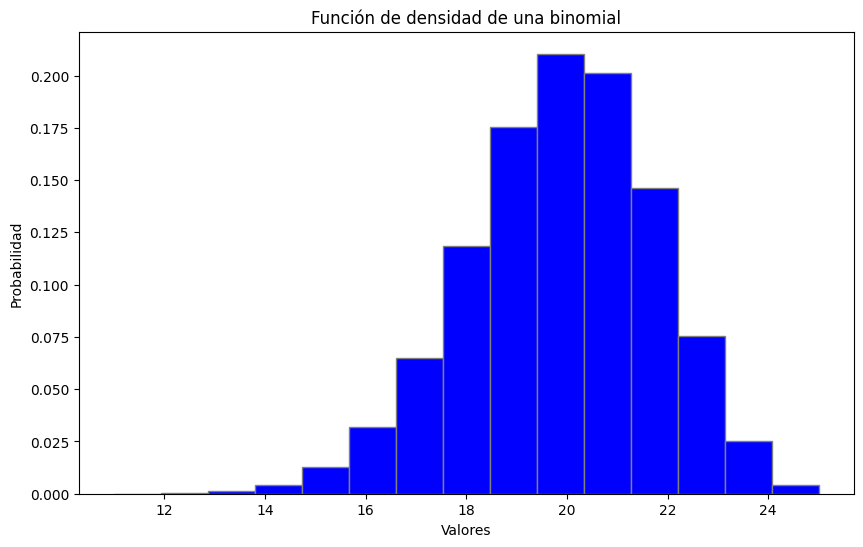

In [7]:
n = 25 # número de ensayos bernoulli
p = 0.8 # probabilidad de éxito
s= 100000 # número de muestras

#Vamos a generar numeros aleatorios que siguen una distribución binomial
binom_numeros = sps.binom.rvs(n,p,size=s) 

#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    binom_numeros,
    density=True, # Normaliza el area para que sea 1
    bins=len(np.unique(binom_numeros)), # número de barras del histograma
    color = "blue",
    edgecolor="grey" 
)

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una binomial')
#plt.grid(True)
plt.show() #mostrar el gráfica